# Основы статистики в Python при использовании numpy, scipy, pandas 

При использовании материалов курса "Основы статистики" https://stepik.org/course/76/syllabus

In [90]:
#Импортируем предварительно все используемые в проекте библиотеки 

import numpy as np
from scipy import stats
from scipy.stats import norm,t
import statistics 
import pandas as pd
import matplotlib.pyplot as plt



## Меры центральной тенденции и меры изменчивости 

##### Вычисление моды, медианы, среднего, среднего гармонического

Numpy, scipy.stats, statistics

In [26]:
sample = np.array([1, 1, 2, 10, 14, 2])
#Мод в массиве может быть несколько, поэтому вывод множественный
print('mode:', stats.mode(sample))

print('median:', np.median(sample))

print('mean:', np.mean(sample))
# Для вычисления гармонического среднего не должно быть отрицательных значений
print(f'harmonic mean:{stats.hmean(sample):.2f}')

# Другой способ вычисления среднего гармонического
print(f'harmonic_mean = {statistics.harmonic_mean(sample):.2f}')


mode: ModeResult(mode=array([1]), count=array([2]))
median: 2.0
mean: 5.0
harmonic mean:1.89
harmonic_mean = 1.89


Pandas, scipy.stats

In [27]:
sample = pd.Series([1, 1, 2, 10, 14, 2])

print('mode:', sample.mode())
print('median:', sample.median())
print('mean:', sample.mean())
print(f'harmonic_mean = {stats.hmean(sample,axis=0):.2f}')

mode: 0    1
1    2
dtype: int64
median: 2.0
mean: 5.0
harmonic_mean = 1.89


##### Вычисление размаха, среднеквадратического отклонения (выборки)

Numpy

In [30]:
sample = np.array([1, 1, 2, 10, 14, 2])
# Вычисление размаха Peak To Peak
print(f'Peak to Peak: {np.ptp(sample)}')

# STD - standart deviation ddof - берется из формулы для поправки дисперсии N-ddof (количество степеней свободы), у нас 1
print(f'Standard deviation: {np.std(sample, ddof=1):.2f}')

Peak to Peak: 13
Standard deviation: 5.59


Pandas

In [36]:
s = pd.Series([1, 2, 3])
s.std()

1.0

Построение диаграммы boxplot


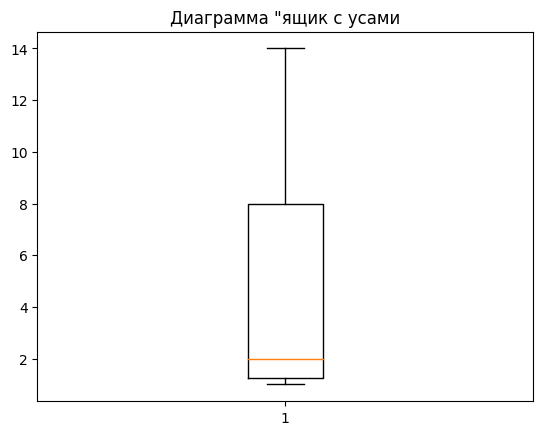

In [42]:
plt.title('Диаграмма "ящик с усами')
plt.boxplot(sample, showfliers=1)
plt.show()

##### Нормальное распределение

In [86]:
# Создадим массив равномерно распределенных чисел на отрезке от norm.ppf(0.01) perce
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)


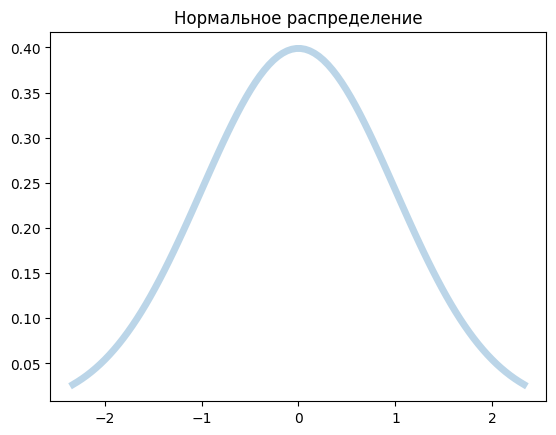

In [87]:

fig, ax = plt.subplots(1, 1)
plt.title('Нормальное распределение')
ax.plot(x, norm.pdf(x),
         lw=5, alpha=0.3, label='norm pdf')

##### Нормальное распределение с другими средними и дисперсией

In [89]:
mean = 5
std = 0.9
x = np.linspace(norm(mean,std).ppf(0.01),norm(mean,std).ppf(0.99))

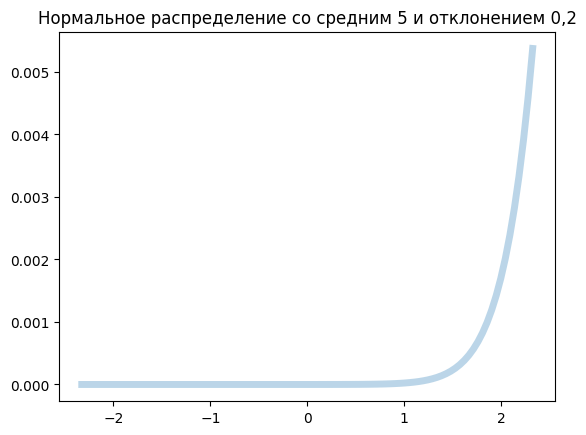

In [88]:
fig, ax = plt.subplots(1, 1)
plt.title('Нормальное распределение со средним 5 и отклонением 0,2')
ax.plot(x, norm(mean,std).pdf(x),
        lw=5, alpha=0.3, label='norm pdf')

Нормальные распределения с разными средними и среднеквадратическими отклонениями  

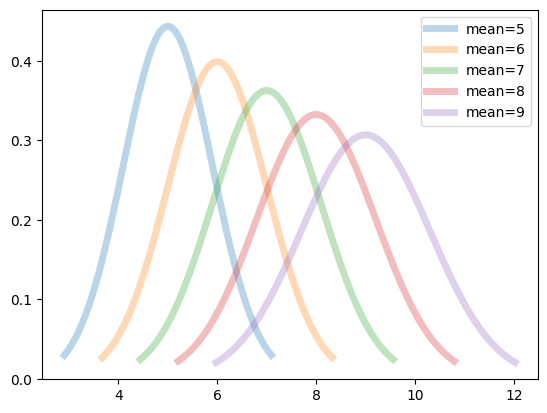

<Figure size 3000x7000 with 0 Axes>

In [82]:
fig, ax = plt.subplots(1, 1)
plt.figure(figsize=(30, 70))
for i in range(5):
    x = np.linspace(norm(mean+i, std+0.1*i).ppf(0.01),
                norm(mean+i, std+0.1*i).ppf(0.99), 100)
    ax.plot(x, norm(mean+i,std+0.1*i).pdf(x), lw=5, alpha=0.3, label= f'mean={mean+i}')
ax.legend()

## T-распределение и критерий Стьюдента

Множество средних выборок из генеральной совокупности (ГС необязательно иметь нормальное распределние) будут иметь распределение близкое к нормальному.
Причём среднее этого распределения будет близко к среднему генеральной совокупности, а стандарное отклонение этого распределение будет называться
стандарной ошибкой среднего (se).

Таким образом **РАСПРЕДЕЛЕНИЕ ВЫБОРОЧНЫХ СРЕДНИХ из ГС будет иметь вид распределения Стьюдента**. 

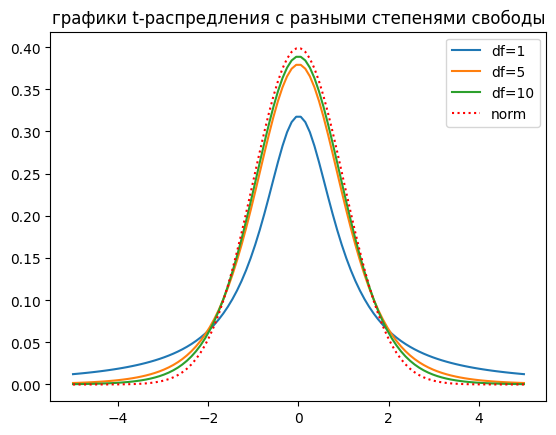

In [93]:
x = np.linspace(-5, 5, 100)
y1, y2, y3 = t.pdf(x, df=1), t.pdf(x, df=5), t.pdf(x, df=10)
y4 = norm.pdf(x)

plt.title('графики t-распредления с разными степенями свободы')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4, 'r:')
plt.legend(('df=1', 'df=5', 'df=10', 'norm'))
plt.show()

Имеем выборку из 15 значений. Предположим, что она была взята из выборки со средним 10. Рассчитаем p-value - вероятность того, что наше значение получено из выборки ГС. 

In [101]:
x = np.array([7,14,8,9,10,10,16,9,9,8,11,10,12,9,9])
mean = x.mean()
std = x.std()
n = 15
u = 10

t = (mean - u)/(std/(n)**(0.5))
df = n - 1

p = 2 * stats.t.sf(abs(t), df)
print(f'p = {p:.3f}')

p = 0.912


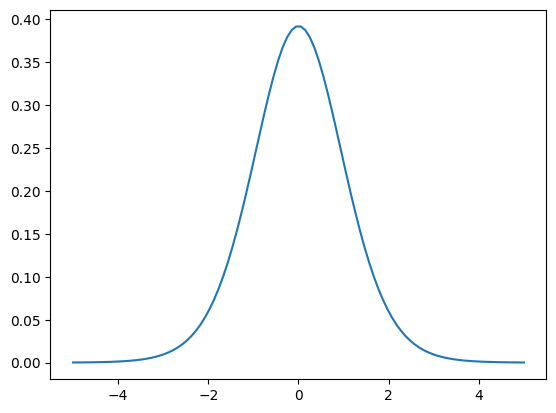

In [103]:
x = np.linspace(-5, 5, 100)
y = stats.t.pdf(x, df)
plt.plot(x, y)

##### Проведение t - тестов. 

Будем использовать библиотеку pandas. 

In [104]:
sample = pd.Series([22.23,41.23, 56.67, 41.56, 12.34, 22.23, 44.23, 45.67]) 

In [105]:
print(sample.mean())

35.769999999999996


Это выборочное среднее. Сформулируем **нулевую гипотезу  среднее генеральной совокупности равно 37** 

In [106]:
value = 37

Уровень статистической значимости

In [107]:
alpha = 0.05

Проведем статистический тест с одной выборкой и двусторонней альтернативной гипотезой.

In [108]:
results = stats.ttest_1samp(sample, value, alternative = 'two-sided') 

In [109]:
results.pvalue

0.8237926305266523

Полученное значение вероятности больше уровня статистической значимости, следовательно нулевую гипотезу отвергнуть нельзя. 

## Однофакторный дисперсионный анализ

T - критерий возможно применять для двух выборок. Для большего количества подойдет дисперсионный анализ или F-критерий, критерий Фишера. 

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу


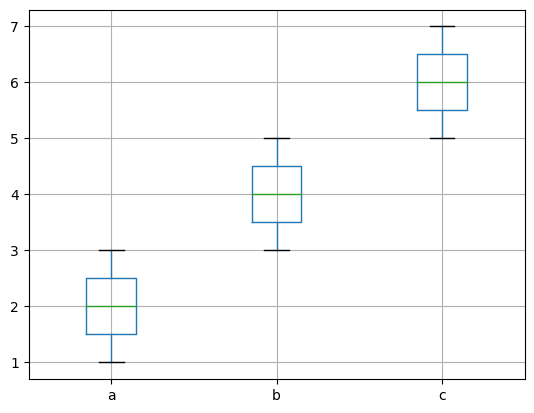

In [111]:
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')